In [1]:
import os
import pandas as pd

In [2]:
input_file_dir = "../dataset/nonfin_2020_2023_striped.csv"

In [3]:
df = pd.read_csv(input_file_dir, header=0, delimiter="|", dtype=str)

In [4]:
df.head()

,dt,trans_type_key,trans_lng_nm,branch_key,sumtrx,branch_address1,branch_address2,region_key,jabo_nonjabotabek,city_key,geography,flag_big_city
0,2020-10-20,435,Pemesanan Warkat,838,3,SENTRA NIAGA HARAPAN INDAH KAV. CP2 NO.1 KOTA ...,17214,9,J,24,JAKARTA,B
1,2021-04-19,727,Cetak Mutasi Harian,259,2,JL. MUWARDI 1/44,11450,10,J,24,NaN,B
2,2021-05-03,482,Buka Blokir Kartu,1074,2,"KOMP. PERUM TAMAN PALEM LESTARI C5 NO. 9 -11, ...",11730,12,J,24,NaN,B
3,2021-03-08,383,Registrasi m-BCA,196,22,JL. TRUNOJOYO 145,68137,7,N,20,NaN,K
4,2021-11-09,436,Penawaran Solusi,1336,1,"JL. RADEN SALEH NO. 39B, KEL. KARANG MULYA, KE...",15157,12,J,24,NaN,B


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15319761 entries, 0 to 15319760
Data columns (total 12 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   dt                 object
 1   trans_type_key     object
 2   trans_lng_nm       object
 3   branch_key         object
 4   sumtrx             object
 5   branch_address1    object
 6   branch_address2    object
 7   region_key         object
 8   jabo_nonjabotabek  object
 9   city_key           object
 10  geography          object
 11  flag_big_city      object
dtypes: object(12)
memory usage: 1.4+ GB


In [6]:
df.isnull().sum()

dt                          0
trans_type_key        3627435
trans_lng_nm              130
branch_key                  0
sumtrx                      0
branch_address1             0
branch_address2         14613
region_key                  0
jabo_nonjabotabek           0
city_key                    0
geography            12385696
flag_big_city               0
dtype: int64

In [7]:
df["branch_key"].unique()

array(['838', '259', '1074', ..., '1793', '1605', '1624'], dtype=object)

In [8]:
import numpy as np

In [9]:
df["sumtrx"] = df["sumtrx"].astype(np.int64)

In [10]:
df["trans_lng_nm"].unique()

array(['Pemesanan Warkat', 'Cetak Mutasi Harian', 'Buka Blokir Kartu',
       'Registrasi m-BCA', 'Penawaran Solusi', 'Penggantian Kartu',
       'Registrasi KBB', 'Reset Kesalahan PIN', 'Registrasi KlikBCA',
       'Pembuatan Data RAD', 'Replacement KeyBCA', 'Cetak Mutasi Bulanan',
       'Ubah Status Buku', 'Kunjungan SDB (Masuk)',
       'Aktivasi Finansial m-BCA', 'Ubah Data KBB',
       'Registrasi Kartu Konvensional', 'Cetak Portofolio Nasabah',
       'Registrasi Key BCA', 'Ubah Data RAD', 'Cetak Surat Referensi',
       'Penyewaan SDB', 'Ubah Penyewaan SDB', 'Registrasi SMS BCA',
       'Blokir Kartu', 'Registrasi BBP',
       'Perubahan Data Tahapan Berjangka', 'Tutup Penyewaan SDB',
       'Reset Bad PIN Count BBP', 'Ubah Data SDB', 'Cetak Perincian GTU',
       'Tambah Stock Warkat', 'Pesan Ulang Warkat', 'Hapus Stock Warkat',
       'Tambah SDB', 'Registrasi Sakuku Plus', 'Perubahan Data Customer',
       'Registrasi Buku Warkat',
       'Penerimaan & Pengambilan Kartu Tert

In [11]:
row_filter = (df["dt"] >= "2022-01-01") & (df["jabo_nonjabotabek"] == "J")
col_filter = ["trans_lng_nm", "sumtrx"]
sumtrx_per_trans_lng_nm = df.loc[row_filter, col_filter].groupby("trans_lng_nm") \
                                                        .sum() \
                                                        .reset_index() \
                                                        .sort_values(by=["sumtrx"], ascending=False)
sumtrx_per_trans_lng_nm

,trans_lng_nm,sumtrx
34,Penggantian Kartu,2101988
3,Cetak Mutasi Bulanan,1965913
18,Pemrek Tahapan/Tabunganku,1708271
26,Pemrek Xpresi,1305663
30,Penawaran Solusi,862568
...,...,...
16,Pemrek Giro Bundling MBCA & KlikBCA,55
33,Pengajuan Terkait Bca Bizz,20
45,Registrasi SMS BCA,16
25,Pemrek Tapres/BCA Dollar Bundling MBCA & KlikBCA,8


## Preparing a Data Frame for sumtrx and dt EDA
- Changed the datatype of "dt" to datetime

In [12]:
df["dt"] = pd.to_datetime(df["dt"])

In [13]:
df.head()

,dt,trans_type_key,trans_lng_nm,branch_key,sumtrx,branch_address1,branch_address2,region_key,jabo_nonjabotabek,city_key,geography,flag_big_city
0,2020-10-20,435,Pemesanan Warkat,838,3,SENTRA NIAGA HARAPAN INDAH KAV. CP2 NO.1 KOTA ...,17214,9,J,24,JAKARTA,B
1,2021-04-19,727,Cetak Mutasi Harian,259,2,JL. MUWARDI 1/44,11450,10,J,24,NaN,B
2,2021-05-03,482,Buka Blokir Kartu,1074,2,"KOMP. PERUM TAMAN PALEM LESTARI C5 NO. 9 -11, ...",11730,12,J,24,NaN,B
3,2021-03-08,383,Registrasi m-BCA,196,22,JL. TRUNOJOYO 145,68137,7,N,20,NaN,K
4,2021-11-09,436,Penawaran Solusi,1336,1,"JL. RADEN SALEH NO. 39B, KEL. KARANG MULYA, KE...",15157,12,J,24,NaN,B


In [14]:
row_filter = (df["dt"] >= "2022-01-01") & (df["jabo_nonjabotabek"] == "J")
col_filter = ["dt", "sumtrx"]
ntrans_per_dt = df.loc[row_filter, col_filter].groupby("dt") \
                                              .sum("sumtrix") \
                                              .reset_index() \
                                              .sort_values(by=["dt"], ascending=True)
ntrans_per_dt

,dt,sumtrx
0,2022-01-01,93
1,2022-01-02,113
2,2022-01-03,45462
3,2022-01-04,37095
4,2022-01-05,34533
...,...,...
529,2023-06-14,32710
530,2023-06-15,34371
531,2023-06-16,29482
532,2023-06-17,4068


## EDA to Get the Distribution of the Data

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
ntrans_per_dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 534 entries, 0 to 533
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   dt      534 non-null    datetime64[ns]
 1   sumtrx  534 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 12.5 KB


In [17]:
ntrans_per_dt.describe()

,sumtrx
count,534.000000
mean,25372.404494
std,17593.893010
min,68.000000
25%,2475.750000
50%,34464.500000
75%,37917.500000
max,54021.000000


In [18]:
quantiles = ntrans_per_dt.sort_values(by=["sumtrx"], ascending=True).quantile([i/10 for i in range(11)])
quantiles

,sumtrx
0.0,68.0
0.1,258.5
0.2,1098.2
0.3,3862.8
0.4,32599.4
0.5,34464.5
0.6,35607.4
0.7,36911.4
0.8,38823.4
0.9,43418.2


In [26]:
sns.set_theme()
sns.set(rc = {'figure.figsize':(16,12)})

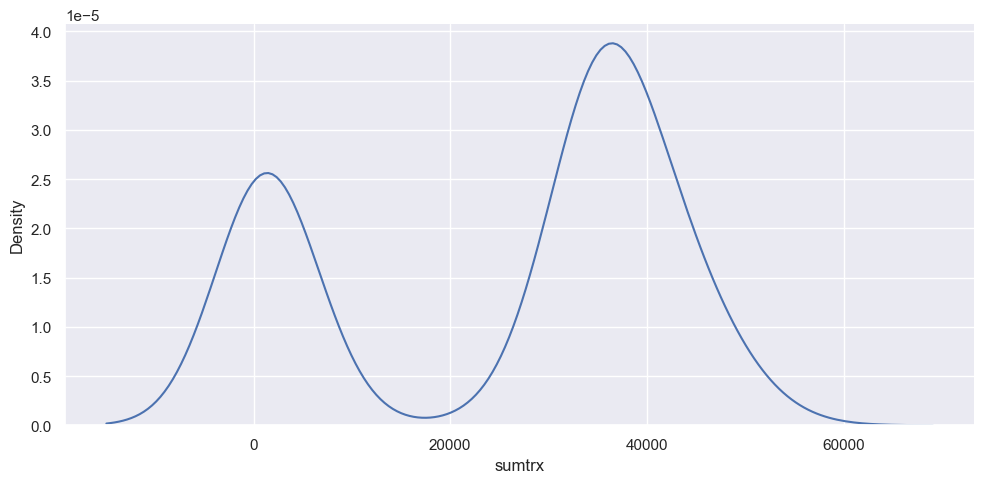

In [35]:
sns.displot(
    data=ntrans_per_dt, x="sumtrx", kind="kde", aspect=2
)

In [22]:
row_filter = (ntrans_per_dt["sumtrx"] < 18000)
col_filter = ["dt"]
ntrans_per_dt.loc[row_filter, col_filter]

,dt
0,2022-01-01
1,2022-01-02
7,2022-01-08
8,2022-01-09
14,2022-01-15
...,...
519,2023-06-04
525,2023-06-10
526,2023-06-11
532,2023-06-17


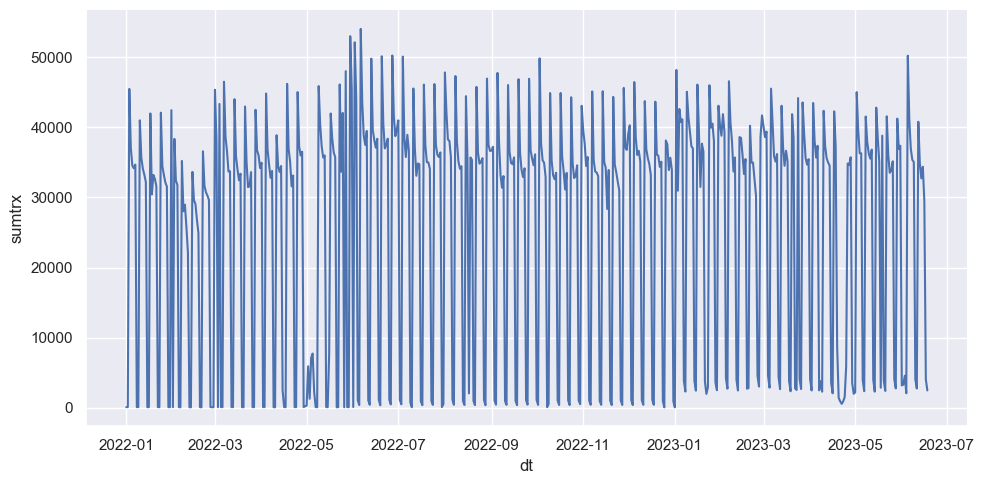

In [36]:
sns.relplot(
    data=ntrans_per_dt,
    kind="line",
    x="dt", y="sumtrx",
    aspect=2
)

In [ ]:
sns.relplot(
    data=ntrans_per_dt,
    kind="line",
    x="dt", y="sumtrx",
    aspect=2
)

- From EDA, it seems that the number of transactions throughout the year is very fluctuative between weekdays and weekends
- Probably separate the data into weekdays and weekdays and train, then train them separately with ARIMA model

In [37]:
ntrans_per_dt_weekdays = ntrans_per_dt[ntrans_per_dt["dt"].dt.weekday < 5]  # Monday to Friday
ntrans_per_dt_weekends = ntrans_per_dt[ntrans_per_dt["dt"].dt.weekday >= 5]  # Saturday and Sunday

In [38]:
ntrans_per_dt_weekdays.head()

,dt,sumtrx
2,2022-01-03,45462
3,2022-01-04,37095
4,2022-01-05,34533
5,2022-01-06,34152
6,2022-01-07,34673


In [39]:
ntrans_per_dt_weekends.head()

,dt,sumtrx
0,2022-01-01,93
1,2022-01-02,113
7,2022-01-08,101
8,2022-01-09,101
14,2022-01-15,88


### Checking for Outliers

#### Weekdays

In [40]:
ntrans_per_dt_weekdays.describe()

,sumtrx
count,380.000000
mean,35137.615789
std,10149.398294
min,78.000000
25%,33843.000000
50%,36060.500000
75%,39627.250000
max,54021.000000


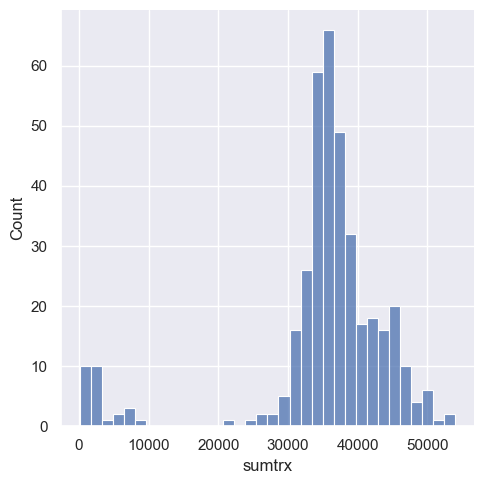

In [41]:
sns.displot(
    data=ntrans_per_dt_weekdays, x="sumtrx"
)

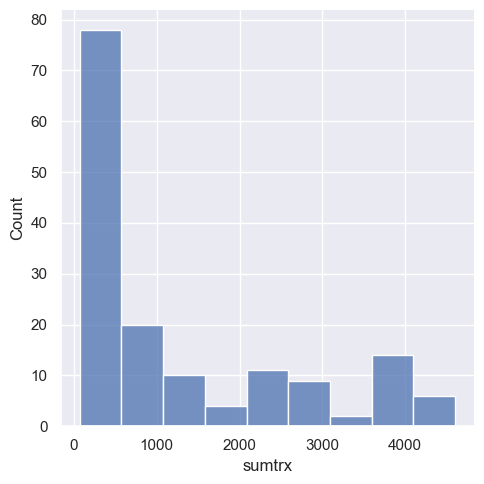

In [42]:
sns.displot(
    data=ntrans_per_dt_weekends, x="sumtrx"
)

## Training ARIMA Model

In [43]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from itertools import product

In [44]:
def get_best_params(train_data, test_data, max_p, max_d, max_q):
    best_rmse = float('inf')
    best_params = None
    p_range = range(0, max_p+1)
    d_range = range(0, max_d+1)
    q_range = range(0, max_q+1)
    for p, d, q in product(p_range, d_range, q_range):
        model = ARIMA(train_data, order=(p, d, q))
        model_fit = model.fit()

        # Make predictions on the test set
        predictions = model_fit.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1)

        # Calculate root mean squared error (RMSE)
        rmse = np.sqrt(mean_squared_error(test_data, predictions))

        # Check if current model outperforms the previous best model
        if rmse < best_rmse:
            best_rmse = rmse
            best_params = (p, d, q)

    return best_params, best_rmse

#### Weekdays

In [45]:
ntrans_per_dt_weekdays.shape[0]

380

In [57]:
train_size = ntrans_per_dt_weekdays.shape[0] * 8 // 10 + 1
train_weekdays = ntrans_per_dt_weekdays.iloc[:train_size]
test_weekdays = ntrans_per_dt_weekdays.iloc[train_size:]

,dt,sumtrx
429,2023-03-06,45504
430,2023-03-07,40629
431,2023-03-08,35896
432,2023-03-09,35100
433,2023-03-10,36184
...,...,...
527,2023-06-12,40785
528,2023-06-13,34853
529,2023-06-14,32710
530,2023-06-15,34371


In [60]:
best_params, best_rmse = get_best_params(train_weekdays["sumtrx"].values, test_weekdays["sumtrx"].values, 7, 2, 3)
print(f"Best parameters found for ARIMA: \n\
      p = {best_params[0]} \n\
      d = {best_params[1]} \n\
      q = {best_params[2]}")

c:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting p

Best parameters found for ARIMA: 
      p = 5 
      d = 0 
      q = 3


c:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [61]:
best_rmse

13268.881251897315

In [62]:
final_model_weekdays = ARIMA(train_weekdays["sumtrx"].values, order=best_params)
final_model_weekdays_fit = final_model_weekdays.fit()

c:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


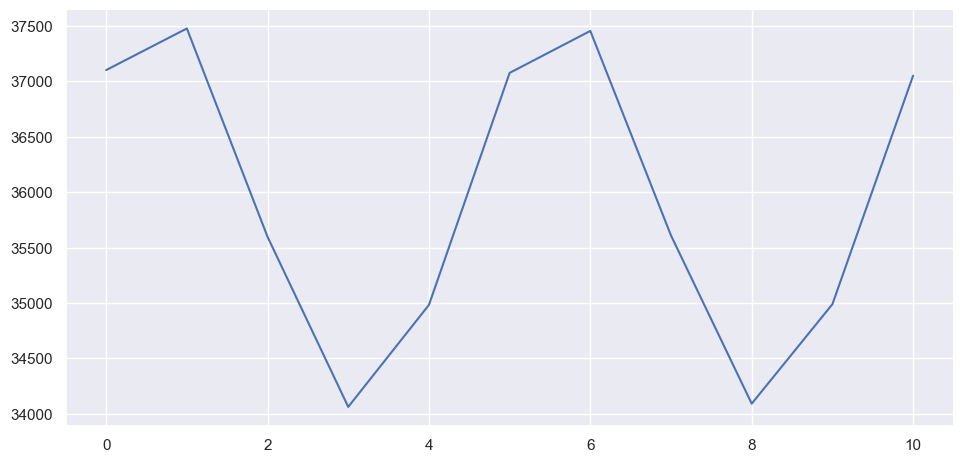

In [63]:
total_size = ntrans_per_dt_weekdays.shape[0]
forecast_weekdays = final_model_weekdays_fit.predict(start=total_size, end=total_size + 10)
sns.relplot(
    data=np.array(forecast_weekdays, dtype=np.int64), kind="line",
    x=range(len(forecast_weekdays)), y=forecast_weekdays,
    aspect=2
)

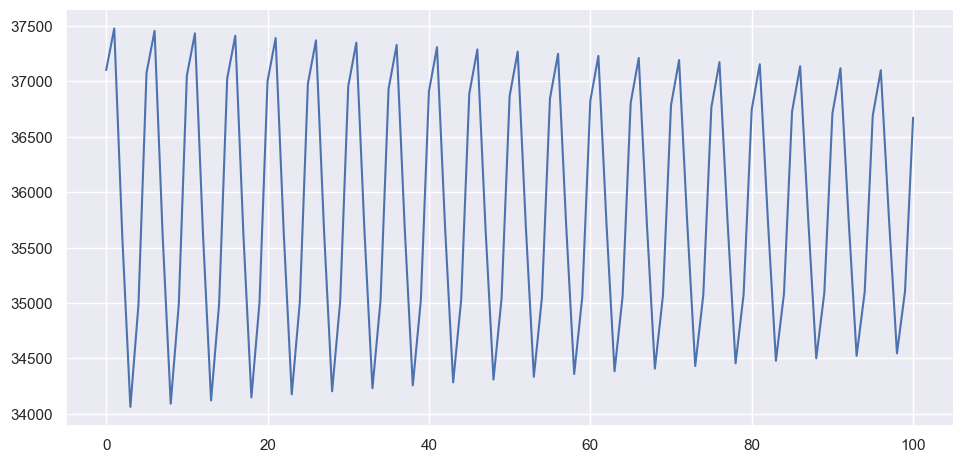

In [64]:
total_size = ntrans_per_dt_weekdays.shape[0]
forecast_weekdays = final_model_weekdays_fit.predict(start=total_size, end=total_size + 100)
sns.relplot(
    data=np.array(forecast_weekdays, dtype=np.int64), kind="line",
    x=range(len(forecast_weekdays)), y=forecast_weekdays,
    aspect=2
)